In [1]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
my_url = "https://www.lottonumbers.com/south-africa-powerball-results-2021"

In [2]:
import pandas as pd

In [3]:
# opening up connection, grabbing the page
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()

In [4]:
#html parsing
page_soup = soup(page_html, "html.parser")

In [5]:
#open file name
filename = "PowerBall.csv"
f = open(filename, "w")

headers = "div1, div2, div3, div4, div5, pb\n"

f.write(headers)

33

## First way of grabbing numbers

In [6]:
#grad div2 numbers
i = 0

while True:
    nb2 = page_soup.findAll('ul', {'class': 'balls -cn'})[i].text
    i += 1
    print(nb2)


13
15
20
28
29
15


14
17
24
31
43
15


18
26
41
44
47
4


8
10
17
26
39
14


16
18
23
31
35
10


8
12
17
28
43
13


2
11
13
19
40
2


2
9
18
42
43
8


9
10
35
42
48
20


6
10
11
45
47
13


21
23
34
35
41
9


6
21
33
37
50
18


10
18
23
30
48
1


5
23
41
42
50
2


1
4
12
13
33
6


7
13
18
20
25
6


8
16
18
30
34
4


4
12
27
35
50
1


5
12
15
28
29
14


21
45
47
48
49
18


7
32
33
40
42
6


20
22
25
41
45
5


2
28
29
38
42
2


3
12
29
31
38
15


1
16
18
26
39
8


20
30
34
38
43
7


6
35
41
43
45
4


4
16
34
36
46
6


3
11
24
33
41
16


3
8
19
28
49
11


13
23
24
27
44
10


9
12
27
37
48
7


1
3
17
28
50
7


17
34
37
39
44
10


3
5
23
37
42
11


31
33
36
38
44
4


3
4
8
25
44
15


19
21
24
45
50
5


4
11
30
35
45
12


3
16
28
31
48
11


4
10
17
29
38
20


4
7
19
20
49
19


3
9
17
25
39
13


6
12
22
38
45
4


1
8
22
29
49
18


5
14
19
30
35
12


3
5
12
32
49
19


2
5
12
25
49
20


6
8
22
31
42
15


18
31
39
45
46
17


3
13
21
42
45
8


4
8
15
25
26
17


7
16
24
25
38
9


5
25
27
42
47
15

IndexError: list index out of range

## 2nd Way of grabbing numbers

In [7]:
#grabs div1 numbers
nb1 = page_soup.findAll("ul", {"class": "balls -cn"})
for nbs in nb1:
    #first number
    div1 = nbs.li.text
    print(div1)

13
14
18
8
16
8
2
2
9
6
21
6
10
5
1
7
8
4
5
21
7
20
2
3
1
20
6
4
3
3
13
9
1
17
3
31
3
19
4
3
4
4
3
6
1
5
3
2
6
18
3
4
7
5
7
5
11
7
28
6
1
1
8
3
5
3
4
8
6
2
4
11
13
24
11
11
4
1


## 3rd way of gradding numbers The best fo far

In [8]:
#grad div2 numbers
div = dict()
for i in range(78):
    nb2 = page_soup.findAll('ul', {'class': 'balls -cn'})[i].text.strip().replace('\n', ',')
    if nb2 not in div:
        div[nb2] = 1
    else:
        div[nb2] += 1
print(div)

{'13,15,20,28,29,15': 1, '14,17,24,31,43,15': 1, '18,26,41,44,47,4': 1, '8,10,17,26,39,14': 1, '16,18,23,31,35,10': 1, '8,12,17,28,43,13': 1, '2,11,13,19,40,2': 1, '2,9,18,42,43,8': 1, '9,10,35,42,48,20': 1, '6,10,11,45,47,13': 1, '21,23,34,35,41,9': 1, '6,21,33,37,50,18': 1, '10,18,23,30,48,1': 1, '5,23,41,42,50,2': 1, '1,4,12,13,33,6': 1, '7,13,18,20,25,6': 1, '8,16,18,30,34,4': 1, '4,12,27,35,50,1': 1, '5,12,15,28,29,14': 1, '21,45,47,48,49,18': 1, '7,32,33,40,42,6': 1, '20,22,25,41,45,5': 1, '2,28,29,38,42,2': 1, '3,12,29,31,38,15': 1, '1,16,18,26,39,8': 1, '20,30,34,38,43,7': 1, '6,35,41,43,45,4': 1, '4,16,34,36,46,6': 1, '3,11,24,33,41,16': 1, '3,8,19,28,49,11': 1, '13,23,24,27,44,10': 1, '9,12,27,37,48,7': 1, '1,3,17,28,50,7': 1, '17,34,37,39,44,10': 1, '3,5,23,37,42,11': 1, '31,33,36,38,44,4': 1, '3,4,8,25,44,15': 1, '19,21,24,45,50,5': 1, '4,11,30,35,45,12': 1, '3,16,28,31,48,11': 1, '4,10,17,29,38,20': 1, '4,7,19,20,49,19': 1, '3,9,17,25,39,13': 1, '6,12,22,38,45,4': 1, '1,8,

In [ ]:
#keys = div.keys()
#keys

In [ ]:
#df = pd.DataFrame(keys) 
#df

In [9]:
df= pd.DataFrame(div.keys(), columns=['Date'])
df

,Date
0,"13,15,20,28,29,15"
1,"14,17,24,31,43,15"
2,"18,26,41,44,47,4"
3,"8,10,17,26,39,14"
4,"16,18,23,31,35,10"
...,...
73,"24,31,40,45,48,20"
74,"11,13,28,36,37,15"
75,"11,16,28,32,41,6"
76,"4,17,42,46,48,14"


## seperate  one column into 6

In [11]:
df[['div1','div2', 'div3', 'div4', 'div5', 'pb']] = df.Date.str.split(",",expand=True)
df

,Date,div1,div2,div3,div4,div5,pb
0,"13,15,20,28,29,15",13,15,20,28,29,15
1,"14,17,24,31,43,15",14,17,24,31,43,15
2,"18,26,41,44,47,4",18,26,41,44,47,4
3,"8,10,17,26,39,14",8,10,17,26,39,14
4,"16,18,23,31,35,10",16,18,23,31,35,10
...,...,...,...,...,...,...,...
73,"24,31,40,45,48,20",24,31,40,45,48,20
74,"11,13,28,36,37,15",11,13,28,36,37,15
75,"11,16,28,32,41,6",11,16,28,32,41,6
76,"4,17,42,46,48,14",4,17,42,46,48,14


## Drop the 'Date' column

In [12]:
del df['Date']
df

,div1,div2,div3,div4,div5,pb
0,13,15,20,28,29,15
1,14,17,24,31,43,15
2,18,26,41,44,47,4
3,8,10,17,26,39,14
4,16,18,23,31,35,10
...,...,...,...,...,...,...
73,24,31,40,45,48,20
74,11,13,28,36,37,15
75,11,16,28,32,41,6
76,4,17,42,46,48,14


In [51]:
df.to_csv('PowerBall2021.csv')

In [15]:
df.describe()

,div1,div2,div3,div4,div5,pb
count,78,78,78,78,78,78
unique,22,29,32,29,23,20
top,3,16,24,25,45,15
freq,11,9,6,6,7,7


In [22]:
n = 5
df.value_counts()[:n].index.tolist()

[('1', '11', '21', '32', '42', '11'),
 ('4', '7', '15', '30', '32', '10'),
 ('5', '18', '31', '36', '45', '8'),
 ('5', '16', '27', '32', '46', '18'),
 ('5', '14', '19', '30', '35', '12')]

In [38]:
df.mode()

,div1,div2,div3,div4,div5,pb
0,3,16,24,25,44,15
1,NaN,NaN,NaN,32,45,NaN
2,NaN,NaN,NaN,42,48,NaN
3,NaN,NaN,NaN,NaN,49,NaN


In [28]:
df.value_counts()[:5].sort_values(ascending=False)

div1  div2  div3  div4  div5  pb
1     11    21    32    42    11    1
4     7     15    30    32    10    1
5     18    31    36    45    8     1
      16    27    32    46    18    1
      14    19    30    35    12    1
dtype: int64

In [32]:
df['div1'].value_counts()[df['div1'].value_counts() == df['div1'].value_counts().max()]


3    11
Name: div1, dtype: int64

In [33]:
df['div2'].value_counts()[df['div2'].value_counts() == df['div2'].value_counts().max()]


16    9
Name: div2, dtype: int64

In [34]:
df['div3'].value_counts()[df['div3'].value_counts() == df['div3'].value_counts().max()]


24    6
Name: div3, dtype: int64

In [35]:
df['div5'].value_counts()[df['div5'].value_counts() == df['div5'].value_counts().max()]


45    7
48    7
44    7
49    7
Name: div5, dtype: int64

In [36]:
df['pb'].value_counts()[df['pb'].value_counts() == df['pb'].value_counts().max()]

15    7
Name: pb, dtype: int64

In [39]:
df.shape

(78, 6)

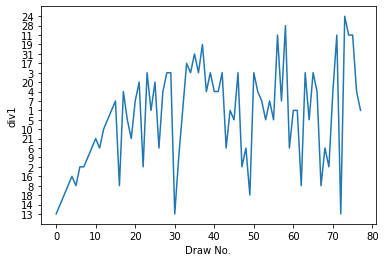

In [48]:
import matplotlib.pyplot as plt
plt.plot(df['div1'])
#plt.title('Confusion matrix')
plt.ylabel('div1')
plt.xlabel('Draw No.')
plt.show()